<a href="https://colab.research.google.com/github/sergioGarcia91/ML_Carolina_Bays/blob/main/11_Model_describe_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, the CSV file containing the calculated metrics for the 75 machine learning models will be analyzed. The metrics were computed considering the test areas AOI 2 and AOI 4, which were not used during training.

# Start

In [ ]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import multiprocessing
import joblib

from IPython.display import clear_output

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Font of the Figures

In [ ]:
!wget https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-03-13 23:25:58--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-03-13 23:25:58--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘Times New Roman.ttf’

Times New Roman.ttf 100%[===================>] 814.89K  --.-KB/s    in 0.08s   

2025-03-13 23:25:59 (10.3 MB/s) - ‘Times New Roman.ttf’ saved [834452/834452]



In [ ]:
import matplotlib.font_manager as fm

In [ ]:
# Path to the custom font
font_path = 'Times New Roman.ttf'

# Add the font to the Matplotlib font manager
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

# Get the font name to use in rcParams
font_name = font_prop.get_name()
font_name

'Times New Roman'

In [ ]:
plt.rcParams['font.family'] = font_name

# Load CSV

In [ ]:
path_saveCSV = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/ML_models'

df = pd.read_csv(os.path.join(path_saveCSV, 'metrics_models_test.csv'), sep=';', decimal=',')

df.head()

,Model,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
0,model_RegLog_002.pkl,0.059022,0.493096,0.420928,0.026955,0.122975,0.686489,0.208585,0.552118,0.647936
1,model_RegLog_003.pkl,0.059059,0.492515,0.421509,0.026917,0.122894,0.686921,0.208489,0.551574,0.647857
2,model_RegLog_004.pkl,0.058932,0.493747,0.420277,0.027045,0.122977,0.685438,0.208539,0.552678,0.647847
3,model_RegLog_005.pkl,0.058883,0.494041,0.419982,0.027093,0.122964,0.684877,0.208495,0.552924,0.647714
4,model_RegLog_006.pkl,0.058963,0.493302,0.420722,0.027013,0.122921,0.685808,0.208476,0.552265,0.647771


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      75 non-null     object 
 1   TP         75 non-null     float64
 2   TN         75 non-null     float64
 3   FP         75 non-null     float64
 4   FN         75 non-null     float64
 5   Precision  75 non-null     float64
 6   Recall     75 non-null     float64
 7   F1         75 non-null     float64
 8   Accuracy   75 non-null     float64
 9   AUC        75 non-null     float64
dtypes: float64(9), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().round(2)

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
count,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00,75.00
mean,0.06,0.52,0.39,0.03,0.12,0.64,0.21,0.58,0.64
std,0.00,0.04,0.04,0.00,0.00,0.05,0.01,0.03,0.01
min,0.05,0.36,0.31,0.02,0.11,0.53,0.19,0.43,0.60
25%,0.05,0.49,0.37,0.03,0.12,0.61,0.21,0.55,0.64
50%,0.05,0.53,0.38,0.03,0.12,0.63,0.21,0.59,0.65
75%,0.06,0.55,0.42,0.03,0.13,0.69,0.21,0.60,0.65
max,0.07,0.60,0.55,0.04,0.13,0.78,0.22,0.65,0.66


In [ ]:
conditions = [
    df['Model'].str.contains('RegLog', case=False, na=False),
    df['Model'].str.contains('RandForest', case=False, na=False),
    df['Model'].str.contains('MLPClassifier', case=False, na=False),
    df['Model'].str.contains('MLP_Classifier', case=False, na=False)
]

choices = ['Logistic Regression', 'Random Forest', 'MLPClassifier', 'MLPClassifier_b']

df['Classifier'] = np.select(conditions, choices, default='Unknown')


In [ ]:
df

,Model,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC,Classifier
0,model_RegLog_002.pkl,0.059022,0.493096,0.420928,0.026955,0.122975,0.686489,0.208585,0.552118,0.647936,Logistic Regression
1,model_RegLog_003.pkl,0.059059,0.492515,0.421509,0.026917,0.122894,0.686921,0.208489,0.551574,0.647857,Logistic Regression
2,model_RegLog_004.pkl,0.058932,0.493747,0.420277,0.027045,0.122977,0.685438,0.208539,0.552678,0.647847,Logistic Regression
3,model_RegLog_005.pkl,0.058883,0.494041,0.419982,0.027093,0.122964,0.684877,0.208495,0.552924,0.647714,Logistic Regression
4,model_RegLog_006.pkl,0.058963,0.493302,0.420722,0.027013,0.122921,0.685808,0.208476,0.552265,0.647771,Logistic Regression
...,...,...,...,...,...,...,...,...,...,...,...
70,model_MLP_Classifier_001b.pkl,0.067204,0.360994,0.553030,0.018773,0.108353,0.781655,0.190323,0.428198,0.628750,MLPClassifier_b
71,model_MLP_Classifier_002b.pkl,0.051295,0.535565,0.378458,0.034682,0.119359,0.596614,0.198921,0.586860,0.630948,MLPClassifier_b
72,model_MLP_Classifier_003b.pkl,0.045826,0.552569,0.361454,0.040150,0.112517,0.533007,0.185811,0.598396,0.602950,MLPClassifier_b
73,model_MLP_Classifier_004b.pkl,0.058739,0.472783,0.441241,0.027238,0.117482,0.683196,0.200489,0.531521,0.631919,MLPClassifier_b


## Logistic Regression

In [ ]:
df[df['Classifier'] == 'Logistic Regression'].describe().round(2)

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,0.06,0.49,0.42,0.03,0.12,0.69,0.21,0.55,0.65
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.06,0.49,0.42,0.03,0.12,0.68,0.21,0.55,0.65
25%,0.06,0.49,0.42,0.03,0.12,0.68,0.21,0.55,0.65
50%,0.06,0.49,0.42,0.03,0.12,0.69,0.21,0.55,0.65
75%,0.06,0.49,0.42,0.03,0.12,0.69,0.21,0.55,0.65
max,0.06,0.50,0.42,0.03,0.12,0.69,0.21,0.55,0.65


## Random Forest

In [ ]:
df[df['Classifier'] == 'Random Forest'].describe().round(2)

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,0.05,0.55,0.37,0.03,0.13,0.61,0.21,0.60,0.64
std,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00
min,0.05,0.53,0.36,0.03,0.12,0.60,0.21,0.59,0.64
25%,0.05,0.54,0.36,0.03,0.13,0.61,0.21,0.60,0.64
50%,0.05,0.55,0.37,0.03,0.13,0.61,0.21,0.60,0.64
75%,0.05,0.55,0.37,0.03,0.13,0.62,0.21,0.61,0.65
max,0.05,0.56,0.38,0.03,0.13,0.63,0.21,0.61,0.65


## MLPClassifier

In [ ]:
df[df['Classifier'] == 'MLPClassifier'].describe().round(2)

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,0.05,0.54,0.38,0.03,0.12,0.60,0.20,0.59,0.64
std,0.00,0.04,0.04,0.00,0.01,0.06,0.01,0.04,0.02
min,0.05,0.46,0.31,0.02,0.11,0.53,0.19,0.52,0.61
25%,0.05,0.52,0.36,0.03,0.12,0.56,0.20,0.57,0.63
50%,0.05,0.54,0.38,0.03,0.12,0.60,0.20,0.59,0.64
75%,0.05,0.56,0.40,0.04,0.12,0.62,0.21,0.61,0.65
max,0.06,0.60,0.45,0.04,0.13,0.74,0.21,0.65,0.66


## MLPClassifier_b

In [ ]:
df[df['Classifier'] == 'MLPClassifier_b'].describe().round(2)

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,0.06,0.49,0.42,0.03,0.12,0.65,0.20,0.55,0.63
std,0.01,0.08,0.08,0.01,0.01,0.09,0.01,0.07,0.02
min,0.05,0.36,0.36,0.02,0.11,0.53,0.19,0.43,0.60
25%,0.05,0.47,0.38,0.03,0.11,0.60,0.19,0.53,0.63
50%,0.06,0.53,0.38,0.03,0.12,0.67,0.20,0.59,0.63
75%,0.06,0.54,0.44,0.03,0.12,0.68,0.20,0.59,0.63
max,0.07,0.55,0.55,0.04,0.13,0.78,0.22,0.60,0.66


# Plots

In [ ]:
pathSavePlots = '/content/drive/MyDrive/UIS/Doctorado_UIS2198589/1_semestre/TopicosAvanzadosGeofisica/FC_CarolinaBais/Figures_Models/'

In [ ]:
df.iloc[:,1:-1]

,TP,TN,FP,FN,Precision,Recall,F1,Accuracy,AUC
0,0.059022,0.493096,0.420928,0.026955,0.122975,0.686489,0.208585,0.552118,0.647936
1,0.059059,0.492515,0.421509,0.026917,0.122894,0.686921,0.208489,0.551574,0.647857
2,0.058932,0.493747,0.420277,0.027045,0.122977,0.685438,0.208539,0.552678,0.647847
3,0.058883,0.494041,0.419982,0.027093,0.122964,0.684877,0.208495,0.552924,0.647714
4,0.058963,0.493302,0.420722,0.027013,0.122921,0.685808,0.208476,0.552265,0.647771
...,...,...,...,...,...,...,...,...,...
70,0.067204,0.360994,0.553030,0.018773,0.108353,0.781655,0.190323,0.428198,0.628750
71,0.051295,0.535565,0.378458,0.034682,0.119359,0.596614,0.198921,0.586860,0.630948
72,0.045826,0.552569,0.361454,0.040150,0.112517,0.533007,0.185811,0.598396,0.602950
73,0.058739,0.472783,0.441241,0.027238,0.117482,0.683196,0.200489,0.531521,0.631919


In [ ]:
df.columns

Index(['Model', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'F1',
       'Accuracy', 'AUC', 'Classifier'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


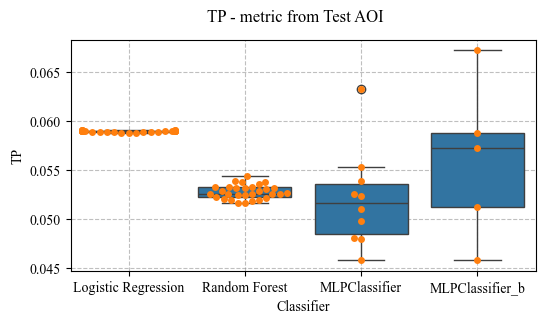

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


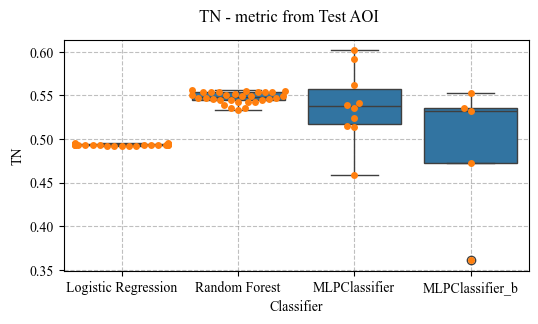

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


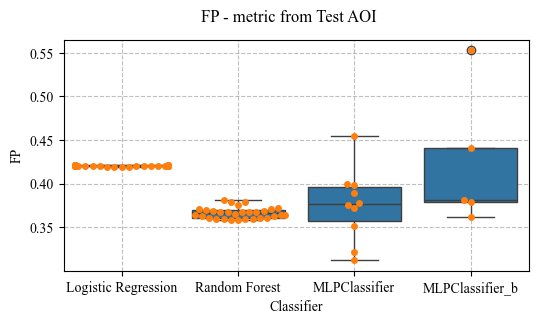

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


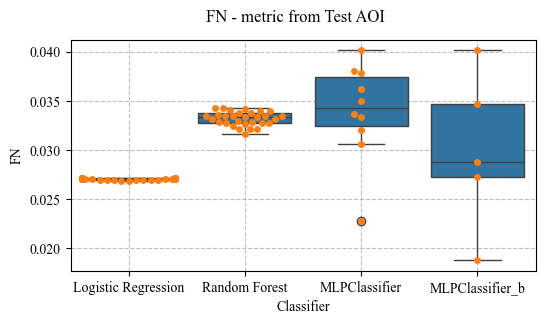

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


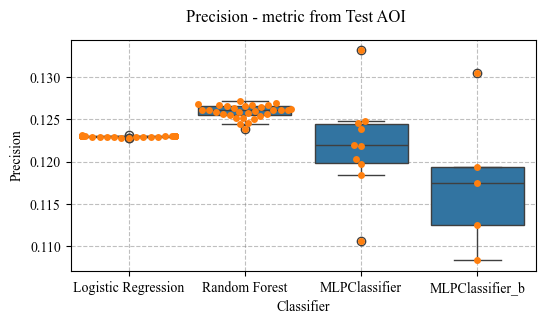

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


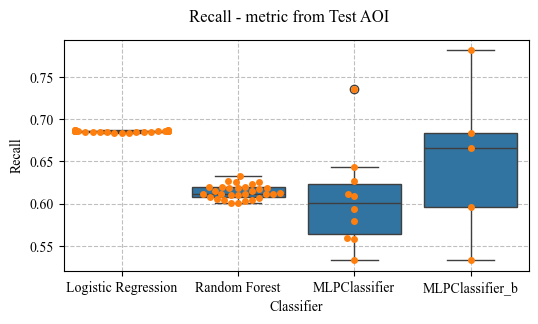

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


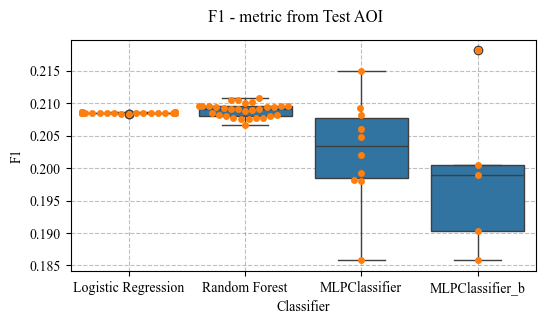

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


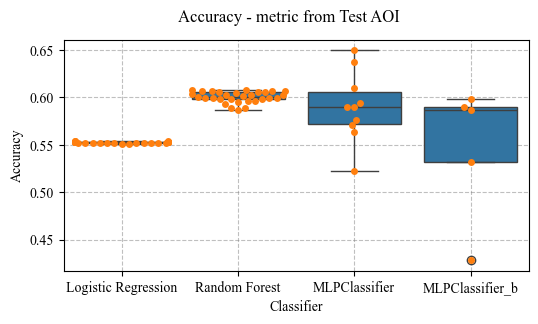

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


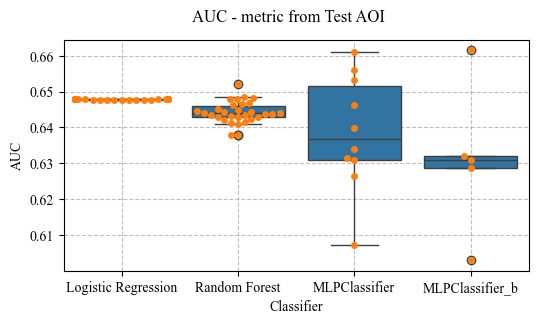

In [ ]:
for col in df.columns[1:-1]:
  plt.figure(figsize=(6, 3))
  # Boxplot y Swarmplot
  sns.boxplot(data=df, y= col, x='Classifier')
  sns.swarmplot(data=df, y= col, x='Classifier')

  plt.grid(ls='--', alpha=0.5, color='grey')

  plt.suptitle(f'{col} - metric from Test AOI')

  plt.savefig(pathSavePlots + f'Metrics_{col}_Test.png',
              dpi=500,
              bbox_inches='tight',
              pad_inches=0.25)

  plt.show()

# End